In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL batch_size'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs'], y_min=30)

In [3]:
with open('ResNet18/run_names_with_true.pkl', 'rb') as file:
    run_names_with_true = pickle.load(file)

viz.df.loc[viz.df.run_name.isin(run_names_with_true), 'separate_noise_output'] = 'True'

In [4]:
viz.df.separate_noise_output[viz.df.separate_noise_output!='True'] = 'False'

In [5]:
viz.df.separate_noise_output.value_counts()

False    85
Name: separate_noise_output, dtype: int64

In [6]:
# viz.plot_single_setting_aggregated('stat-wmm;128;True;0.003;5;nan', fontsize=25, filename="example_run_stat-wmm_rehearsal", layout='vertical')


# viz.plot_single_setting_aggregated(';128;False;0.003;5;nan', fontsize=25, filename="example_run_no_rehearsal", layout='vertical')

In [7]:
viz.extract_all_runs_metrics()

Could not fetch metrics in run: 65 UID: stat-wmm;128;False;0.003;5;
Could not fetch metrics in run: 66 UID: stat-wmm;128;False;0.003;5;
Could not fetch metrics in run: 67 UID: stat-wmm;128;False;0.003;5;
Could not fetch metrics in run: 68 UID: stat-wmm;128;False;0.003;5;
Could not fetch metrics in run: 69 UID: stat-wmm;128;False;0.003;5;
Could not fetch metrics in run: 70 UID: stat-wmm;64;False;0.003;5;
Could not fetch metrics in run: 71 UID: stat-wmm;64;False;0.003;5;
Could not fetch metrics in run: 72 UID: stat-wmm;64;False;0.003;5;
Could not fetch metrics in run: 73 UID: stat-wmm;64;False;0.003;5;
Could not fetch metrics in run: 74 UID: stat-wmm;64;False;0.003;5;
Could not fetch metrics in run: 75 UID: stat-wmm;32;False;0.003;5;
Could not fetch metrics in run: 76 UID: stat-wmm;32;False;0.003;5;
Could not fetch metrics in run: 77 UID: stat-wmm;32;False;0.003;5;
Could not fetch metrics in run: 78 UID: stat-wmm;32;False;0.003;5;
Could not fetch metrics in run: 79 UID: stat-wmm;32;False

In [11]:
from matplotlib import pyplot as plt
import numpy as np


def box_plot(metric_name, df, filename=None):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    # labels = [f"{uid.split(';')[1]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90)
    plt.title(f"metic: {metric_name}       label convention: dataset pretraining? epochs")
    plt.xlabel("unique identifier")
    plt.ylabel("accuracy [%]")
    plt.show()

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf')
        plt.savefig("images/"+filename+".svg", format='svg')

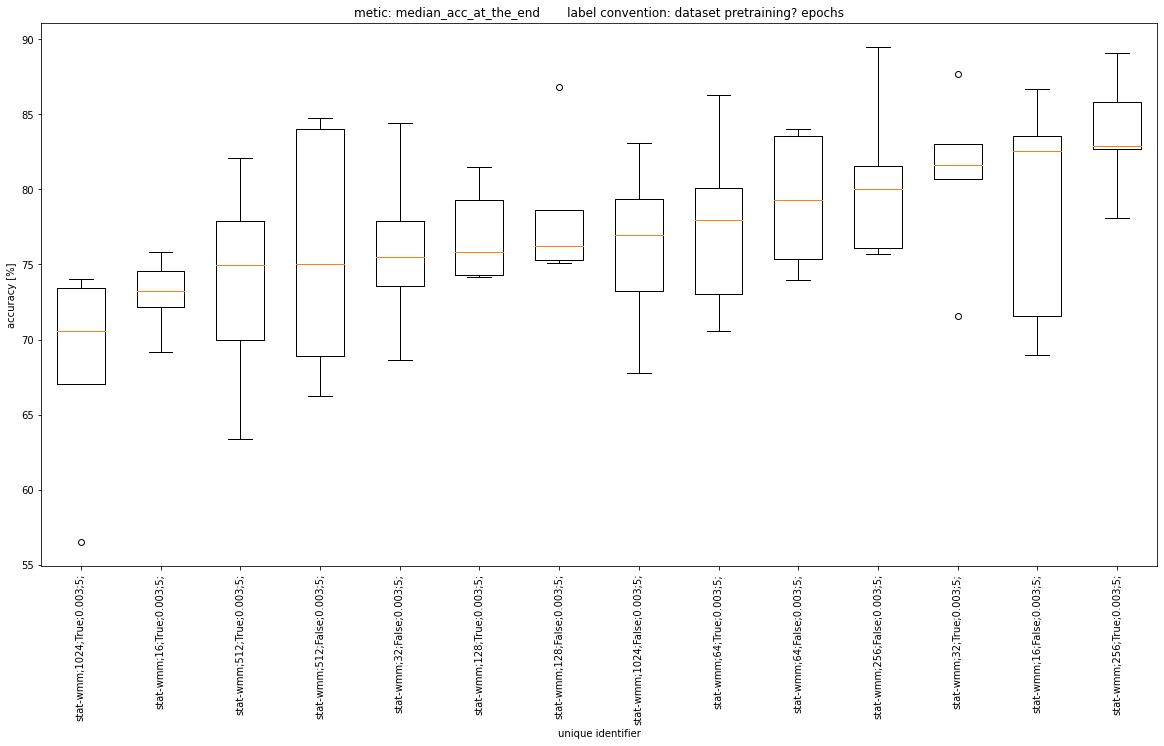

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,rehearsal_dataset,batch_size_rehearsal,pretraining,learning_rate,epochs,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,stat-wmm;64;True;0.003;5;,75.599998,84.050552,3.625000,90.099998,55.000000,77.949997,83.220345,4.466667,91.349998,...,stat-wmm,64,True,0.003,5,77.430000,77.949997,40.696922,3.973333,86.300000
1,stat-wmm;64;True;0.003;5;,70.900002,71.937363,1.525000,77.000000,51.250000,86.300003,84.778082,0.750000,88.550003,...,stat-wmm,64,True,0.003,5,83.820003,86.300003,38.620658,1.050000,86.410002
2,stat-wmm;64;True;0.003;5;,55.500000,56.381319,2.150000,64.099998,50.700001,61.150002,61.966438,1.766665,66.449997,...,stat-wmm,64,True,0.003,5,73.159999,80.099998,34.967740,1.798333,77.920000
3,stat-wmm;64;True;0.003;5;,77.250000,80.209066,2.287500,86.400002,52.599998,64.949997,70.526370,3.866669,76.550003,...,stat-wmm,64,True,0.003,5,69.900000,70.550003,35.083902,2.110834,75.600002
4,stat-wmm;64;True;0.003;5;,69.900002,68.268232,0.937500,73.650002,51.549999,72.050003,74.802069,3.283333,81.900002,...,stat-wmm,64,True,0.003,5,76.230000,73.050003,36.748983,1.599168,80.020001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,stat-wmm;16;False;0.003;5;,86.650002,84.155000,0.887499,90.199997,57.099998,80.699997,80.374375,2.150002,87.150002,...,stat-wmm,16,False,0.003,5,83.739999,86.650002,42.283875,1.782500,87.709999
66,stat-wmm;16;False;0.003;5;,60.450001,64.236250,2.712501,71.300003,50.500000,61.650002,64.485000,3.966667,73.550003,...,stat-wmm,16,False,0.003,5,72.810000,71.599998,37.733834,2.665835,79.590002
67,stat-wmm;16;False;0.003;5;,78.250000,73.529750,0.462500,80.099998,52.950001,83.550003,81.840938,2.733332,91.750000,...,stat-wmm,16,False,0.003,5,82.060002,83.550003,41.142464,1.949165,86.619998
68,stat-wmm;16;False;0.003;5;,63.549999,63.426250,1.912499,71.199997,46.500000,76.150002,78.338438,2.633334,84.050003,...,stat-wmm,16,False,0.003,5,69.390000,69.000000,36.886677,3.449167,77.450000


<Figure size 432x288 with 0 Axes>

In [16]:
df = viz.metrics_df.copy()

# df = df[(df['learning_rate']=='0.003') & (df['epochs']=='5') & (df['rehearsal_dataset']=='stat-wmm')]
# df = df[(df['batch_size_rehearsal'] != '128')]

box_plot('median_acc_at_the_end', df, 'dataset_res18_no_seperaye')

df

In [17]:
df.value_counts('UID')

UID
stat-wmm;1024;False;0.003;5;    5
stat-wmm;1024;True;0.003;5;     5
stat-wmm;128;False;0.003;5;     5
stat-wmm;128;True;0.003;5;      5
stat-wmm;16;False;0.003;5;      5
stat-wmm;16;True;0.003;5;       5
stat-wmm;256;False;0.003;5;     5
stat-wmm;256;True;0.003;5;      5
stat-wmm;32;False;0.003;5;      5
stat-wmm;32;True;0.003;5;       5
stat-wmm;512;False;0.003;5;     5
stat-wmm;512;True;0.003;5;      5
stat-wmm;64;False;0.003;5;      5
stat-wmm;64;True;0.003;5;       5
dtype: int64

In [18]:
# viz.plot_single_setting_aggregated('stat-wmm;16;True;0.003;5;None', fontsize=25, filename=None, layout='vertical')

# All runs

Error in run: 65 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 66 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 67 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 68 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 69 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 70 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 71 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3

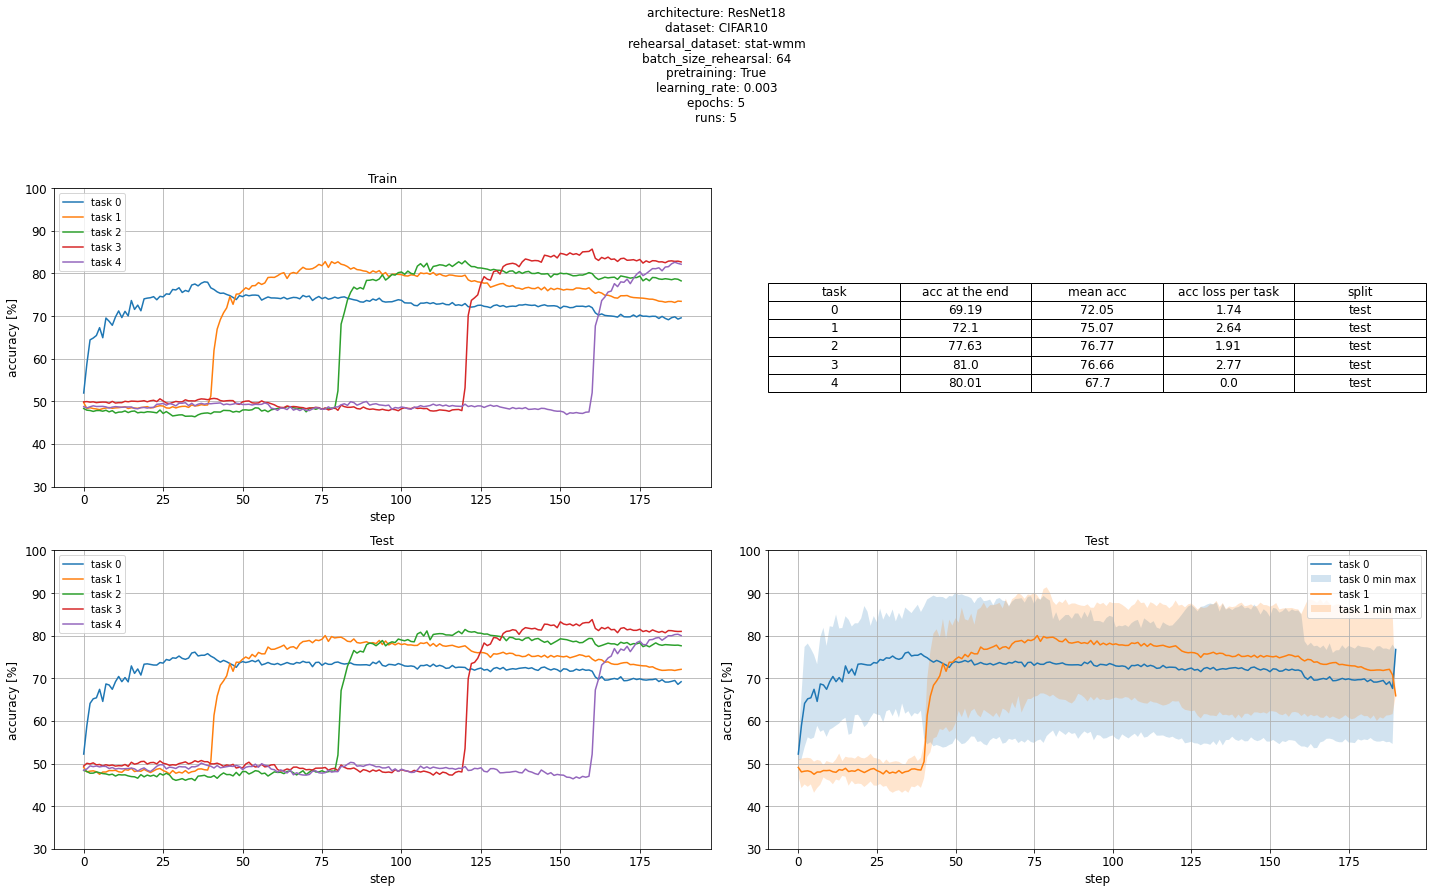

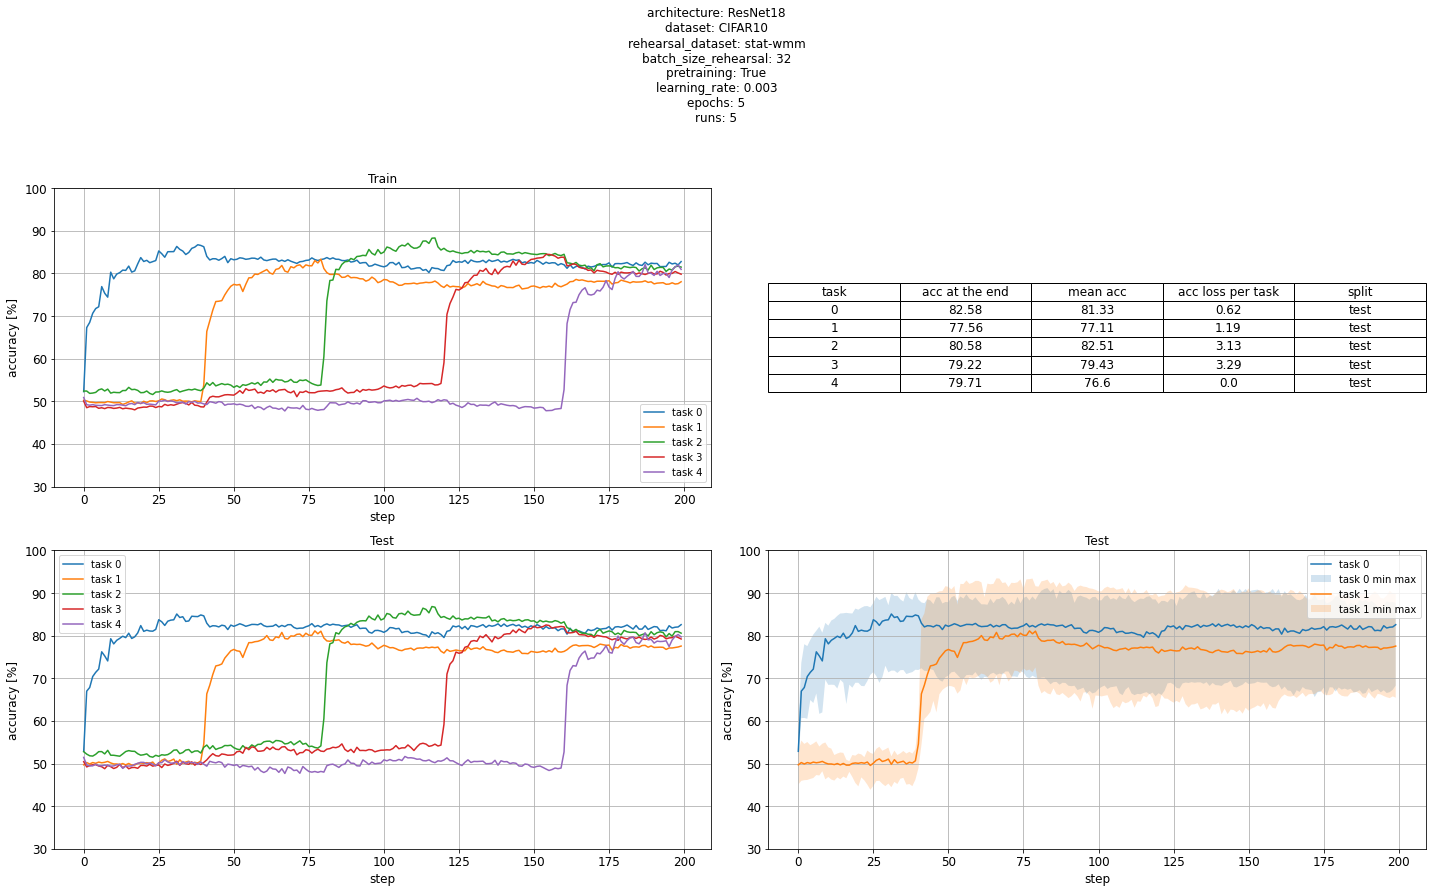

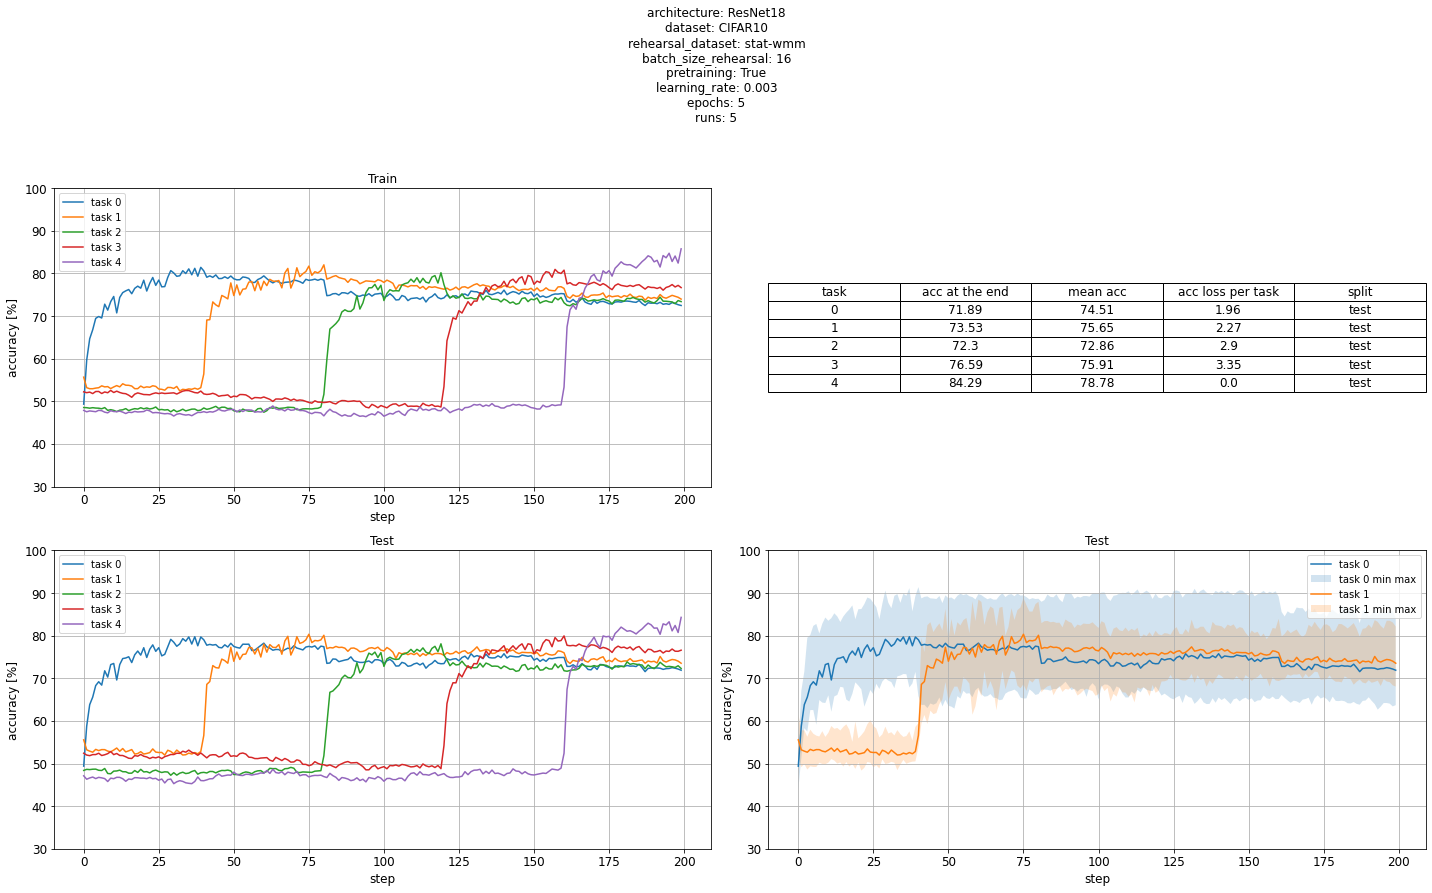

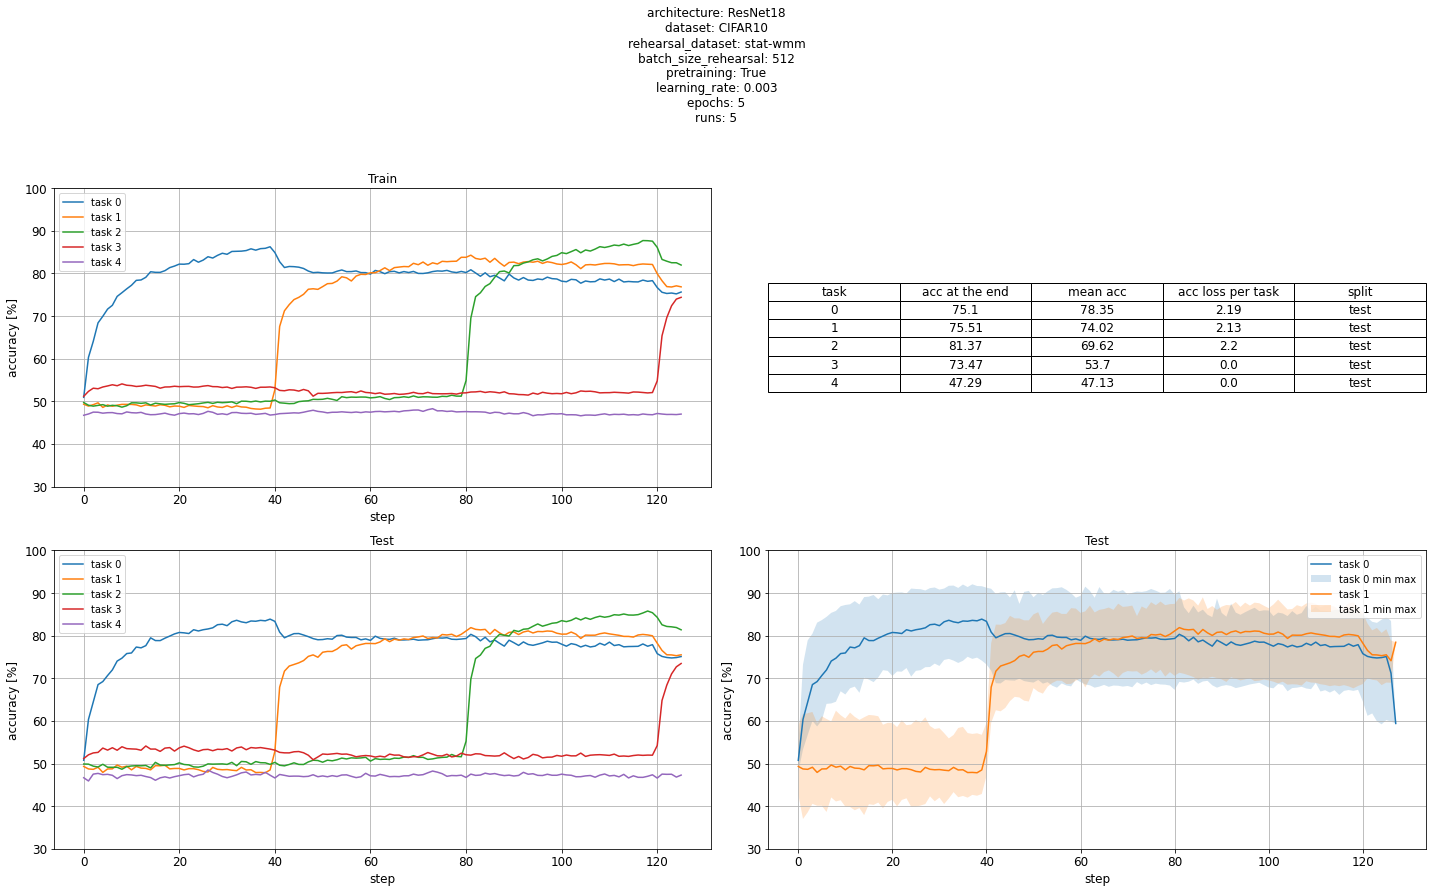

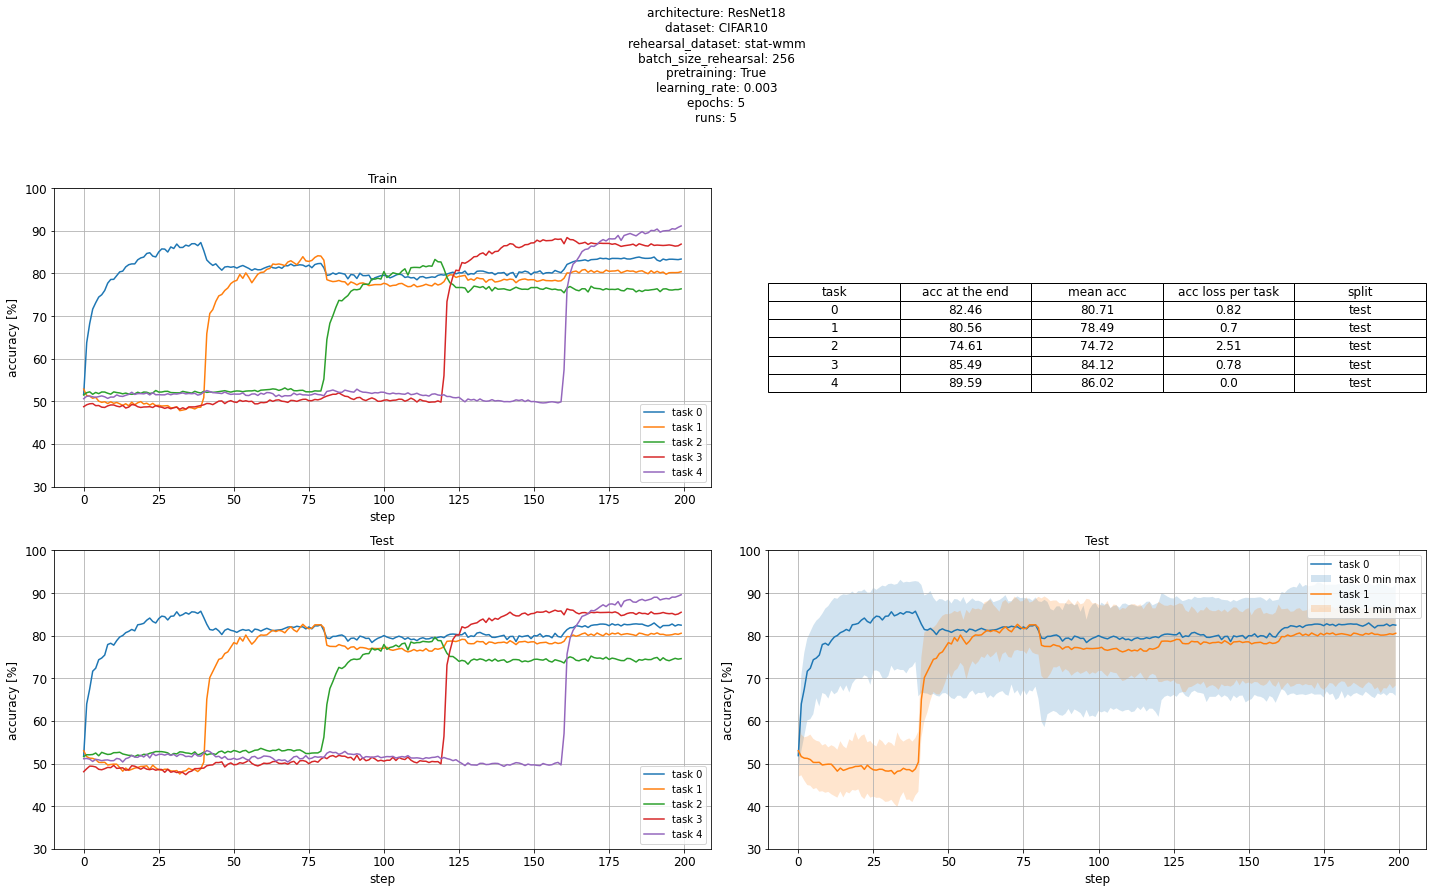

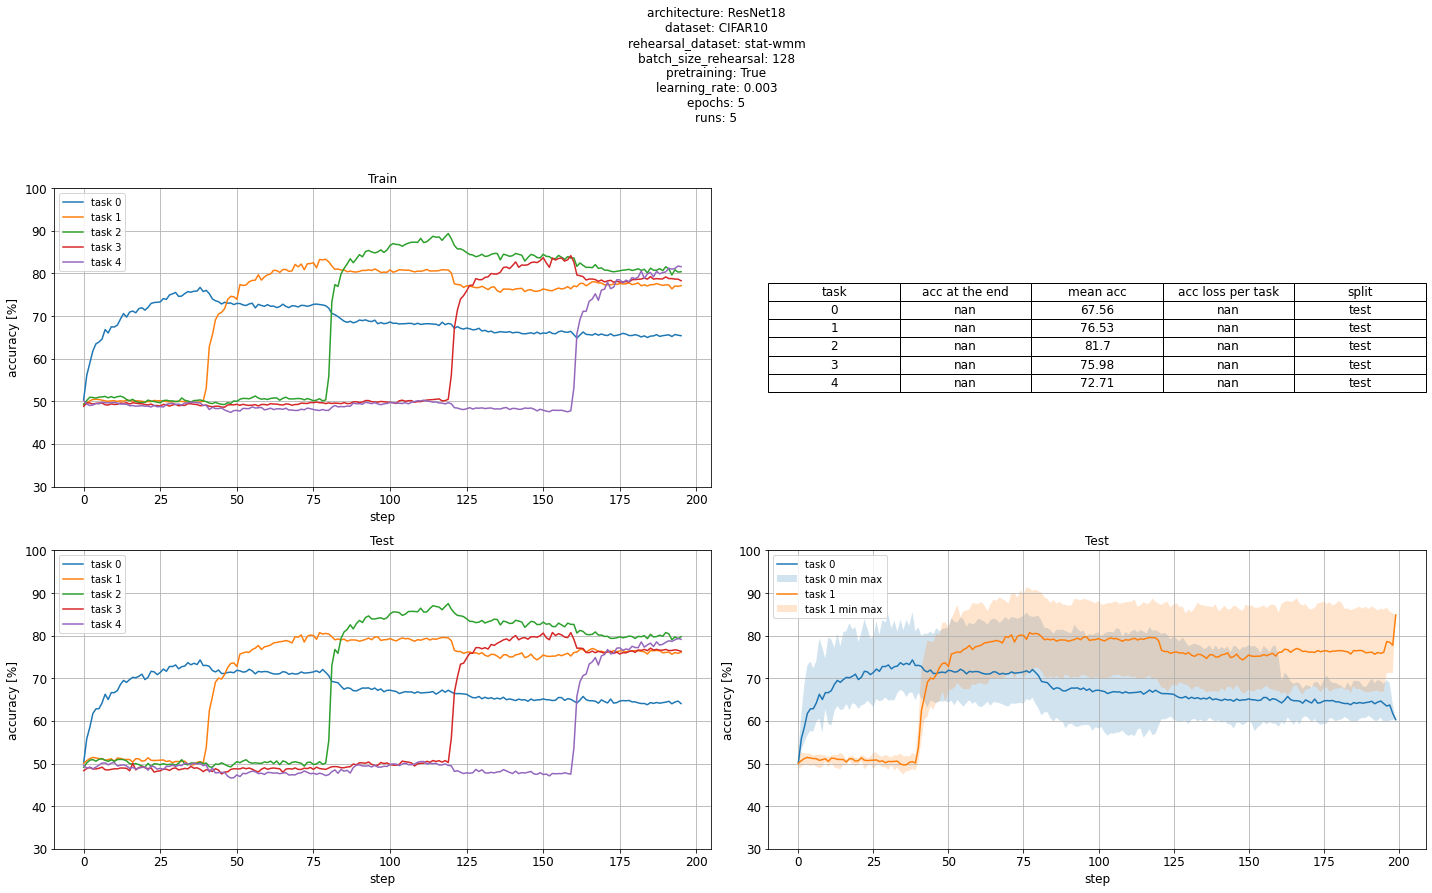

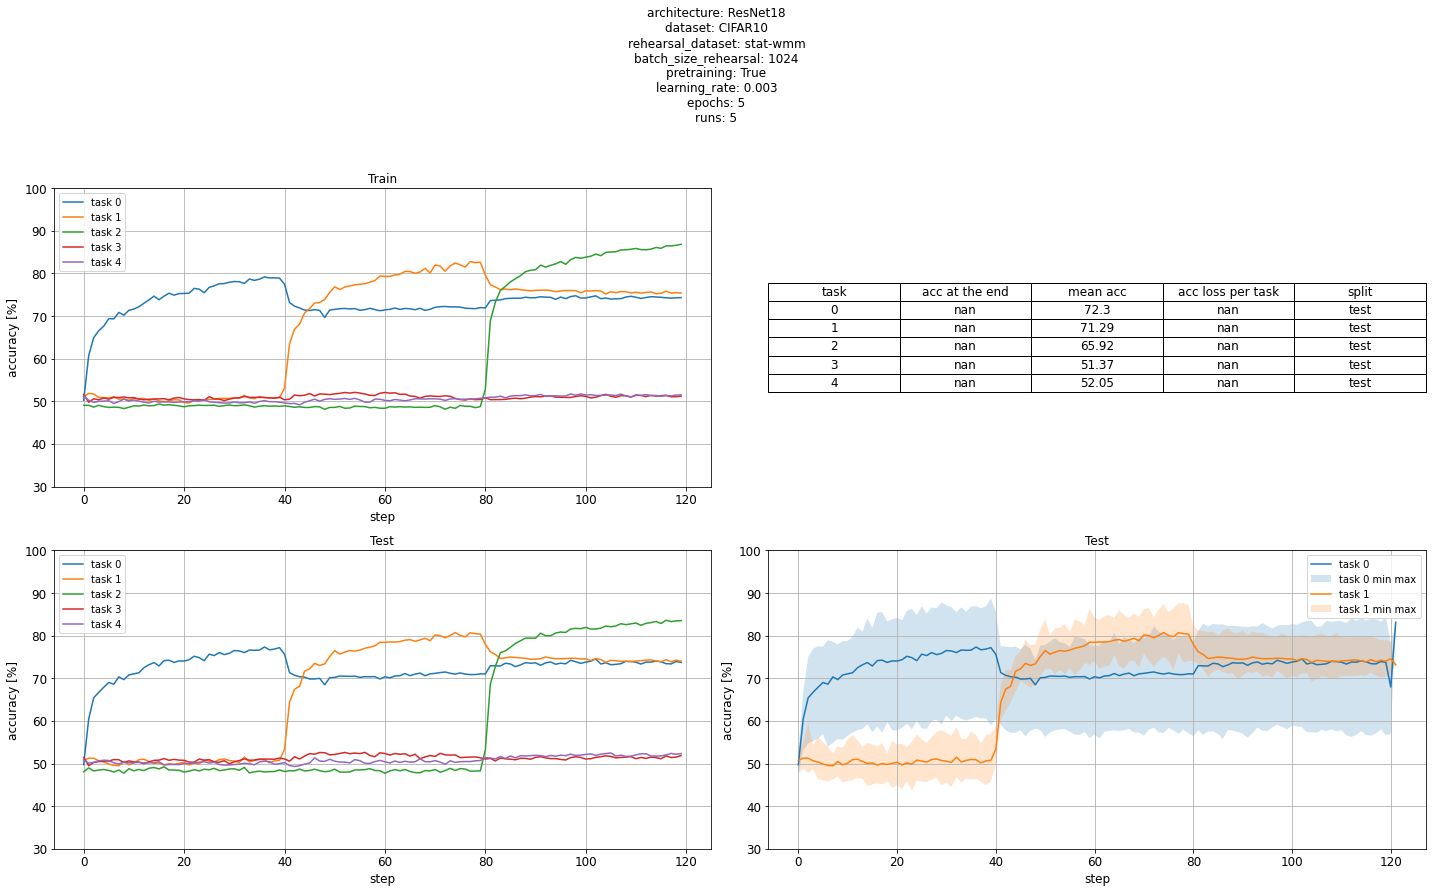

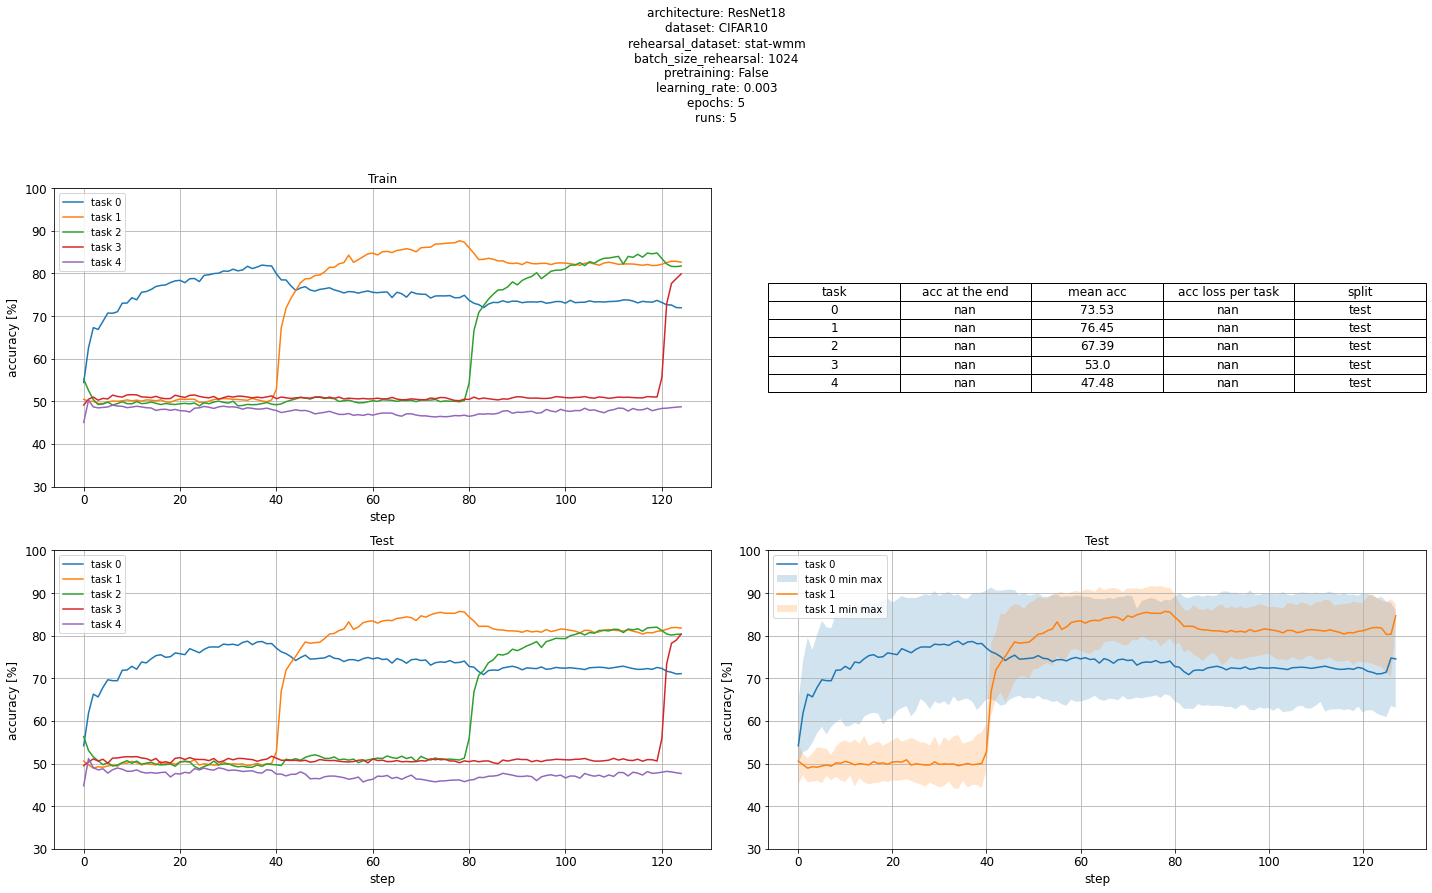

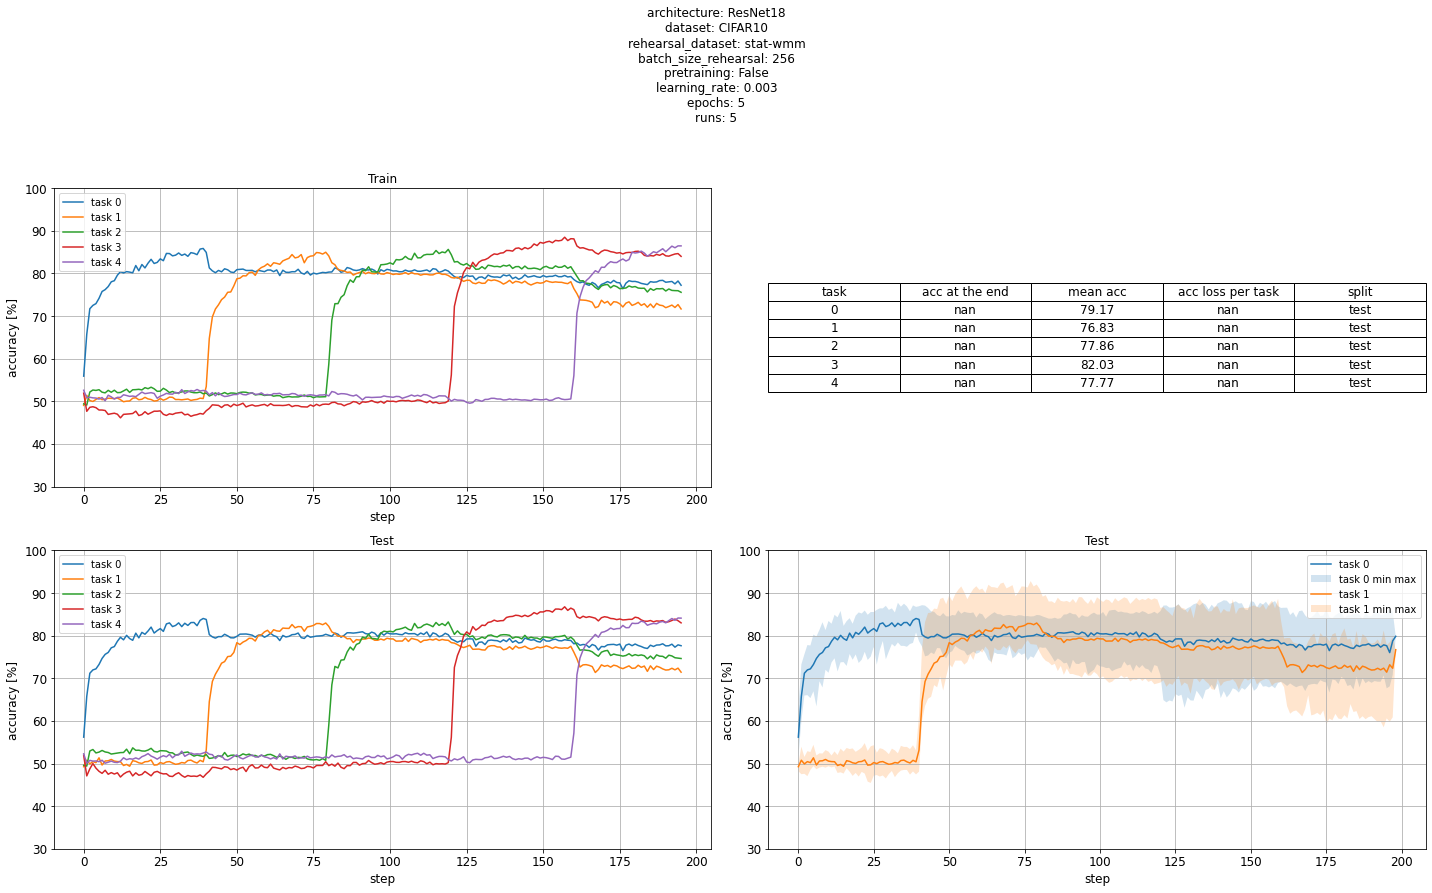

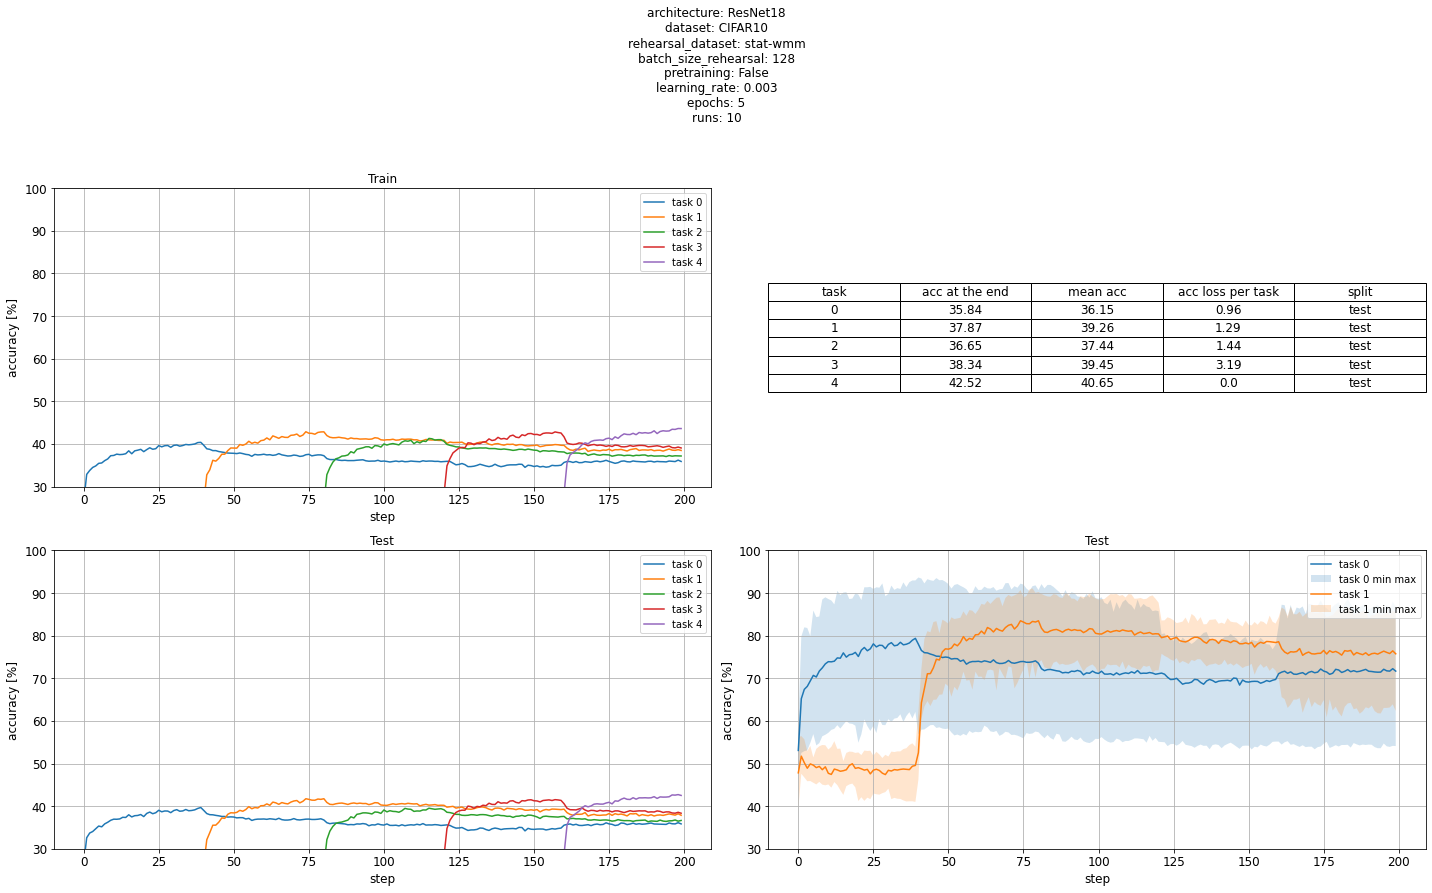

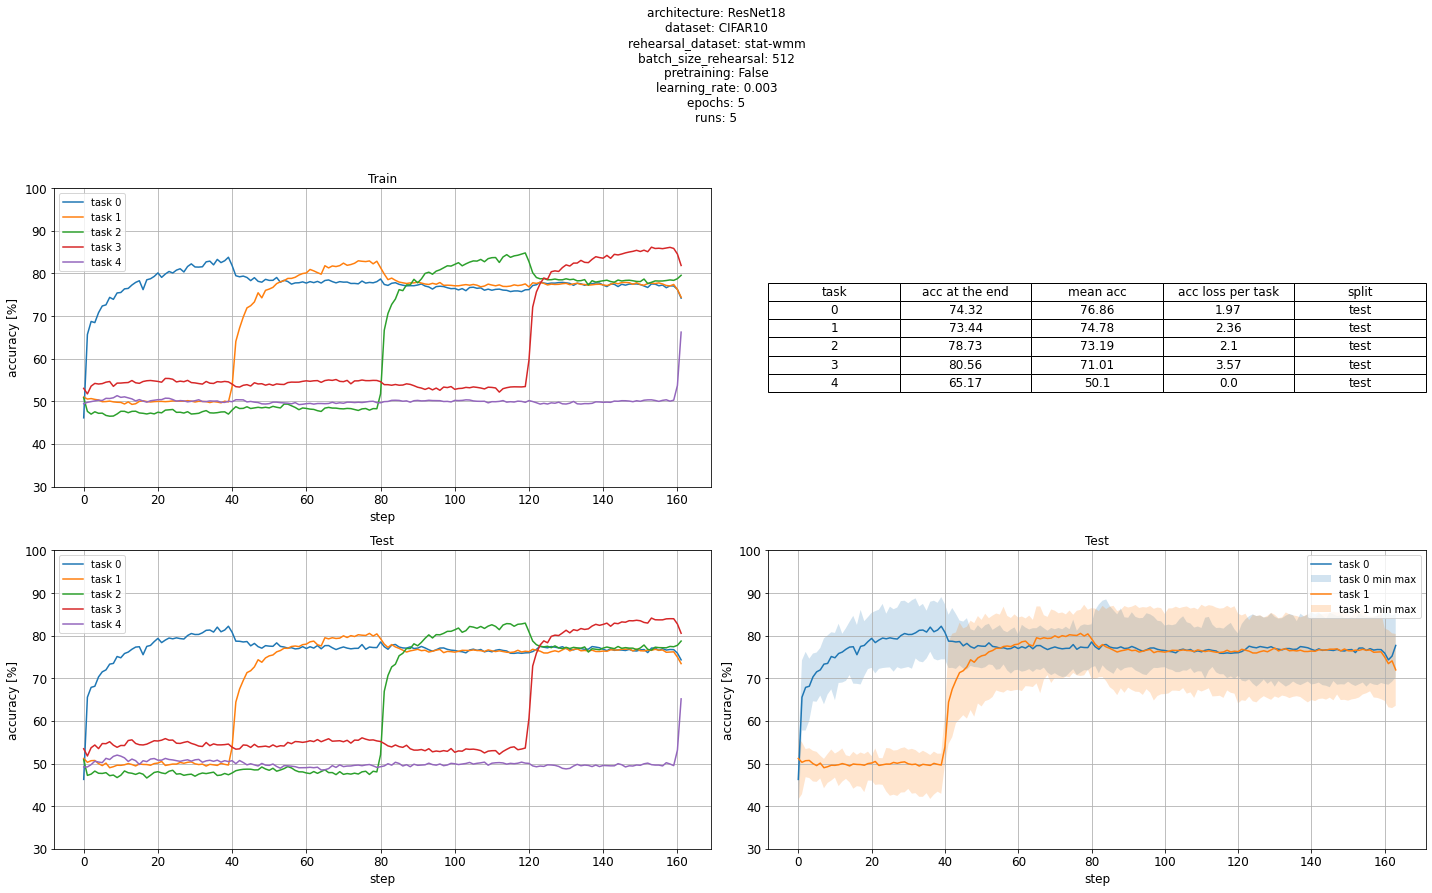

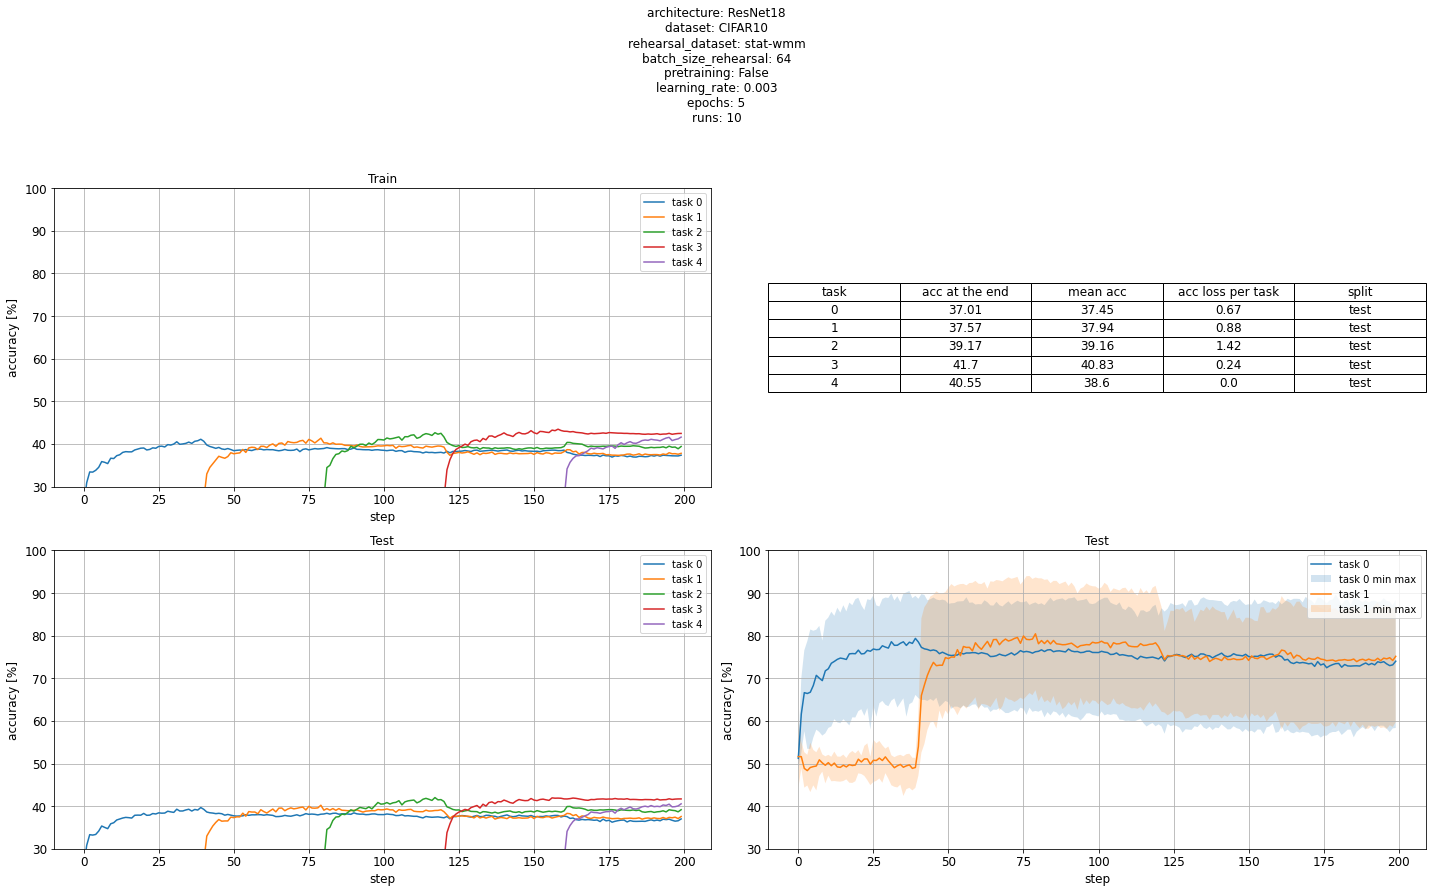

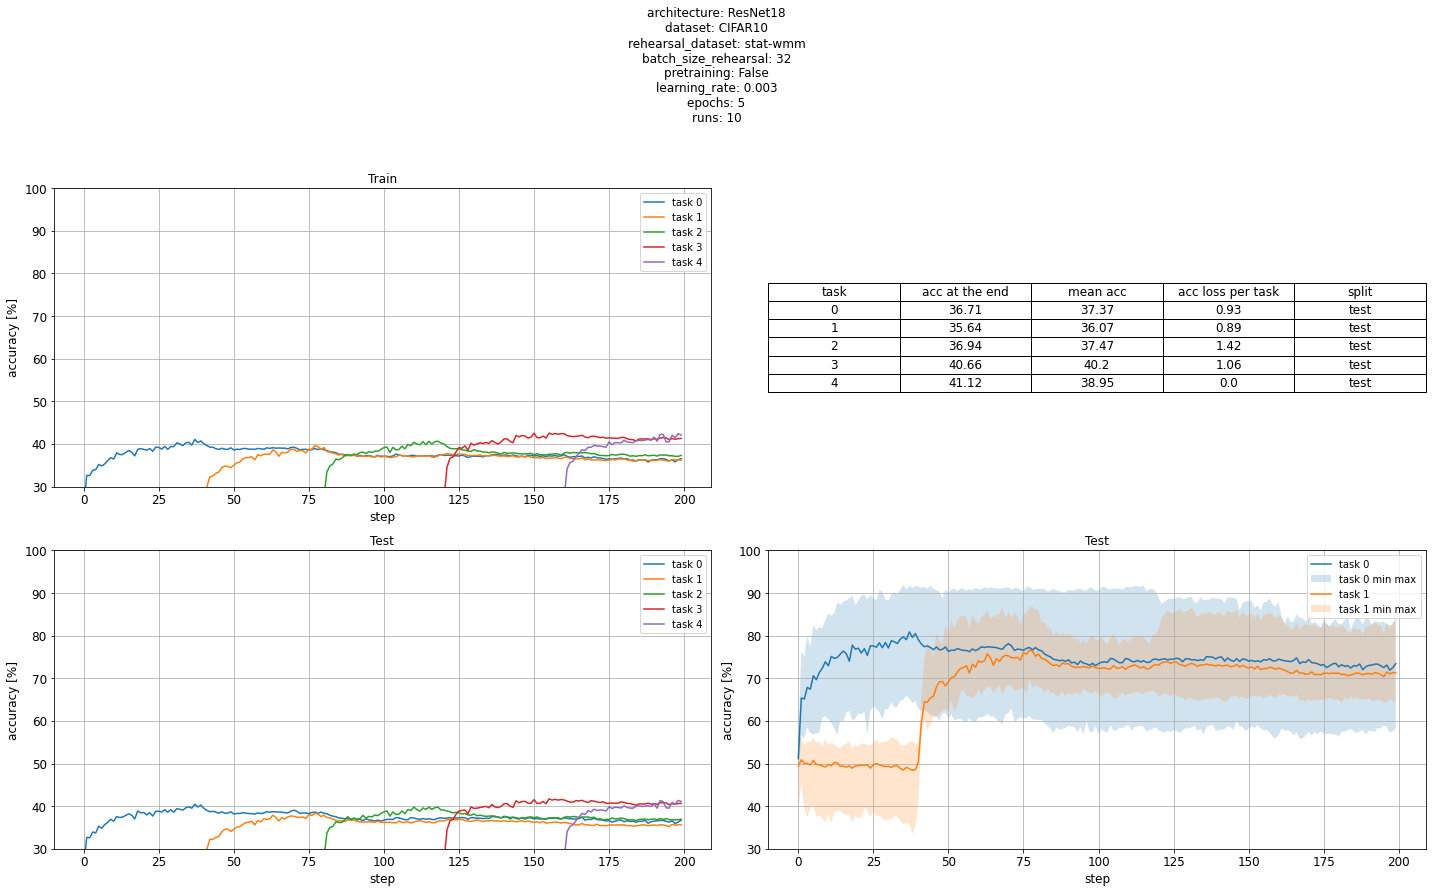

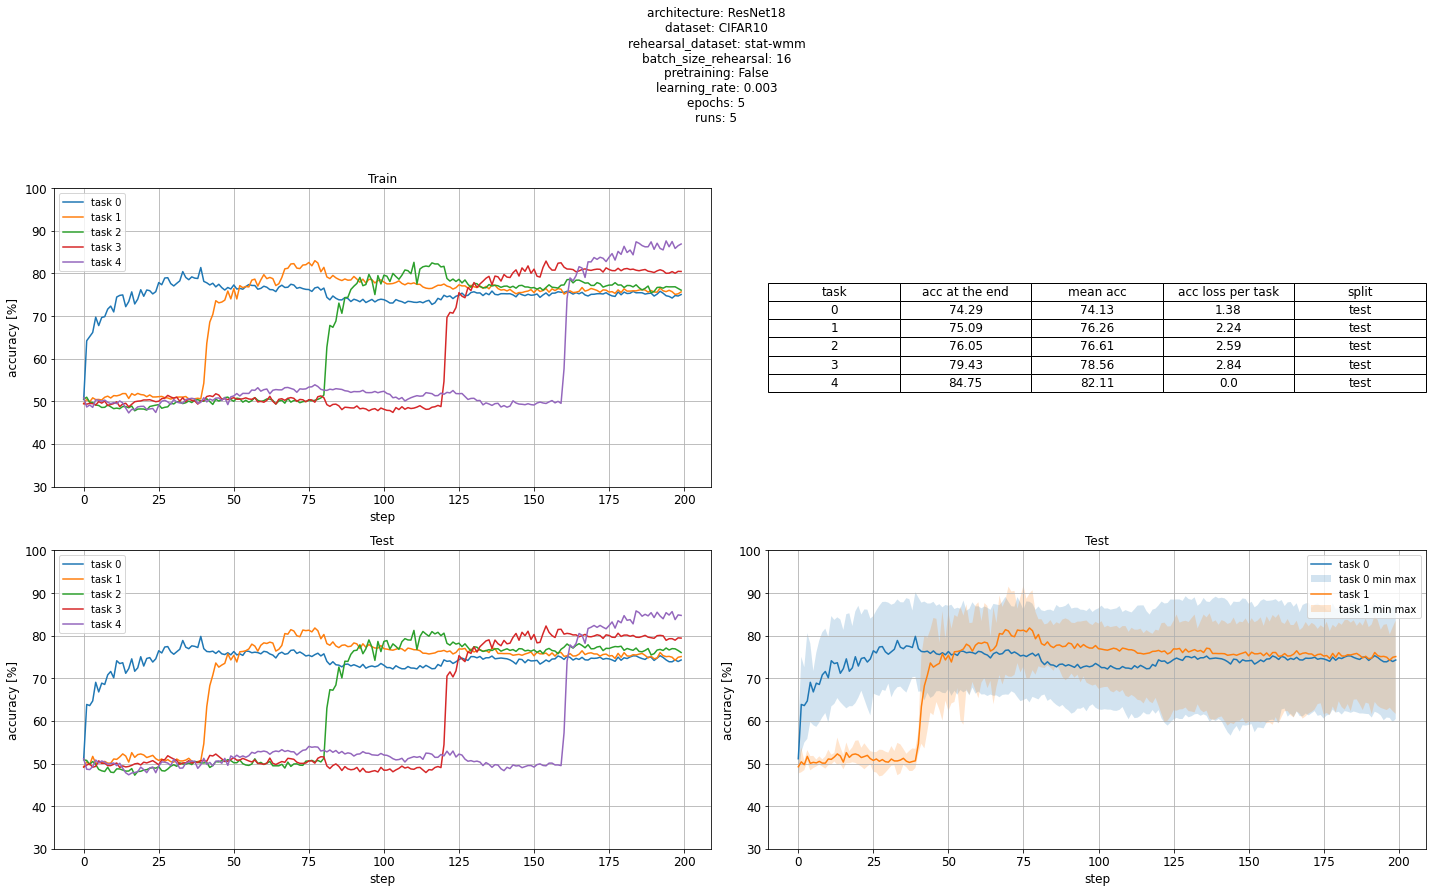

In [19]:
viz.plot_everything()